# Cab Ride Price Prediction...
We have seen variation in prices of a cab ride. What factors affect the prices of cab ride? How much the company can change the price and still not losing customers?
To solve this query, we can run some tests which can provide a solution to the company, that how much variation is good for a company to make more profit and still not losing the valuable customers.

# Data Importing

In [59]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import sweetviz as sv
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
%matplotlib inline
from datetime import datetime
import missingno as msno
from sklearn.metrics import f1_score



#  Car Ride Share Dataset

Downloading dataset from the github folder. here we have 5 csv file containing data fir Uber and lyf cab ride.
So, we download all 4 files and merge into one dataframe called "car_ride_df0". Which is our main data frame. 
we do have other file called 'weather.csv' and we will set those data into "weather_df".

In [2]:
# Importing dataset from git
car_ride_arr = ["cab_rides_1.csv","cab_rides_2.csv","cab_rides_3.csv","cab_rides_4.csv"]
car_ride_df0 = pd.DataFrame()
for i in car_ride_arr:
    df = pd.DataFrame()
    url = "https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/" + i
    print("Fetching data from " + url)
    df = pd.read_csv(url, error_bad_lines=False) 
    car_ride_df0 = pd.concat([car_ride_df0,df],ignore_index=True)
    print("=== Data successfully appended ===")

Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_1.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_2.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_3.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_4.csv
=== Data successfully appended ===


In [3]:
car_ride_df = car_ride_df0 #Assign to another dataframe for future scope and Printing our main car ride dataset
car_ride_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
car_ride_df.shape

(693017, 10)

In [7]:
car_ride_df.describe()

,distance,time_stamp,price,surge_multiplier
count,663070.000000,6.630700e+05,610381.000000,663070.000000
mean,2.188727,1.544046e+12,16.543457,1.013854
std,1.138801,6.893010e+08,9.324696,0.091662
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.270000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


# Weather Dataset

In [4]:
#Downloading weather dataset
url = "https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/weather.csv"
weather_df0 = pd.read_csv(url, error_bad_lines=False) 

In [5]:
weather_df = weather_df0
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


Here, we are only working on car_ride_df dataset, to see some insight and see what we have in our data.

somehow, we got 83k blank rows in our dataset, so we will remove this rows.

In [8]:
weather_df.shape

(6276, 8)

In [9]:
weather_df.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


# Working on Car Ride Share Dataset
Removing null values from dataset

In [10]:
total = car_ride_df.isnull().sum().sort_values(ascending=False)
total

price               82636
name                29947
product_id          29947
id                  29947
surge_multiplier    29947
source              29947
destination         29947
time_stamp          29947
cab_type            29947
distance            29947
dtype: int64

Here we remove empty rows from the dataframe, which area almost around 83k.

In [11]:
car_ride_df = car_ride_df.dropna()
car_ride_df.shape

(610381, 10)

In [12]:
# getting unique values of below columns
cols = ['destination', 'source', 'cab_type', 'name','surge_multiplier']
l = []
for col in cols:
    print("Unique value of " + col)
    print(len(car_ride_df[col].unique()))
    l.append(car_ride_df[col].unique())
print(l)

Unique value of destination
12
Unique value of source
12
Unique value of cab_type
2
Unique value of name
12
Unique value of surge_multiplier
7
[array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object), array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object), array(['Lyft', 'Uber'], dtype=object), array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object), array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])]


# How many stations we have?
Here we compare destination and source list if they are same that means we have 12 staion. </br>
Here we got 'True' that means we have data of 12 station only.

In [13]:
if(l[0].sort() == l[1].sort()):
    print("True")

True


In [14]:
#Changing the time stamp variable to ymd format.
car_ride_df['ymd'] = car_ride_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x) / 1000).strftime('%Y%m%d'))

car_ride_df  

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,ymd,hour
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,20181216,08
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,20181127,00
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,20181128,01
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,20181130,03
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,20181129,02
...,...,...,...,...,...,...,...,...,...,...,...,...
663064,3.15,Uber,1.543420e+12,Northeastern University,West End,26.5,1.0,6b9cc736-3728-4f5e-b962-dbc8cd5c382b,6c84fd89-3f11-4782-9b50-97c468b19529,Black,20181128,15
663066,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,20181128,15
663067,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,20181214,04
663068,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,20181214,04


The data is from nov 26, 2018 to dec 12, 2018. and we have data for different time too.

In [15]:
for i in car_ride_df[car_ride_df.columns[-2:]]:
    print(i)
    l = car_ride_df[i].unique()
    print(len(l))
    print(np.sort(l))

ymd
16
['20181126' '20181127' '20181128' '20181129' '20181130' '20181201'
 '20181202' '20181203' '20181204' '20181210' '20181213' '20181214'
 '20181215' '20181216' '20181217' '20181218']
hour
24
['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


set the figure size of seaborn graphs to 10*7.

In [77]:
sns.set(rc= {'figure.figsize': (10,8)})

It is clear that, we have almost equal data for both company.

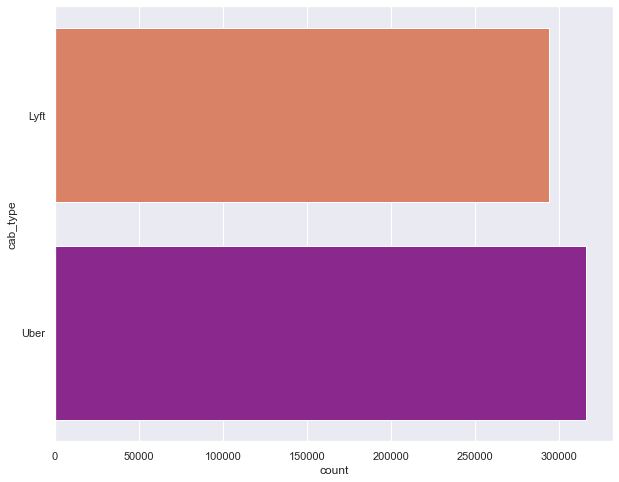

In [78]:
sns.countplot(y = 'cab_type', data =car_ride_df ,palette= 'plasma_r')

There are some days where surge multiplier go higher to 3. That means on that day the price goes high for any ride.

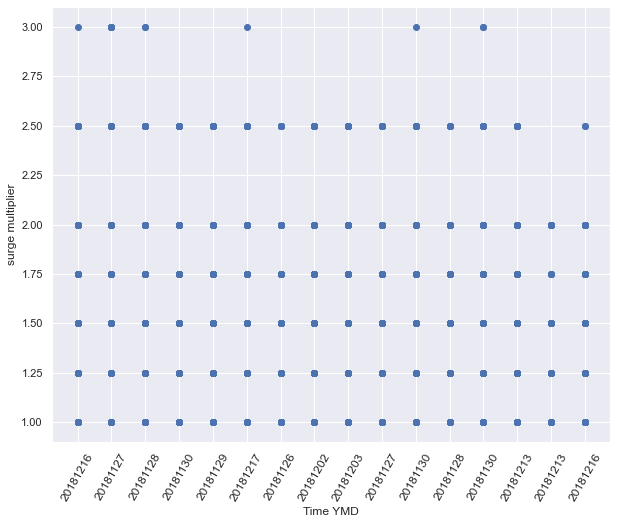

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = car_ride_df['ymd'], y = car_ride_df['surge_multiplier'] )
ax.set_xticklabels(car_ride_df['ymd'],rotation = 60, fontsize = 'medium')
ax.set_xlabel("Time YMD")
ax.set_ylabel("surge multiplier")
plt.show()

The Price variation of a day is between 0 to 100, most of the day has maximum fair price >90.

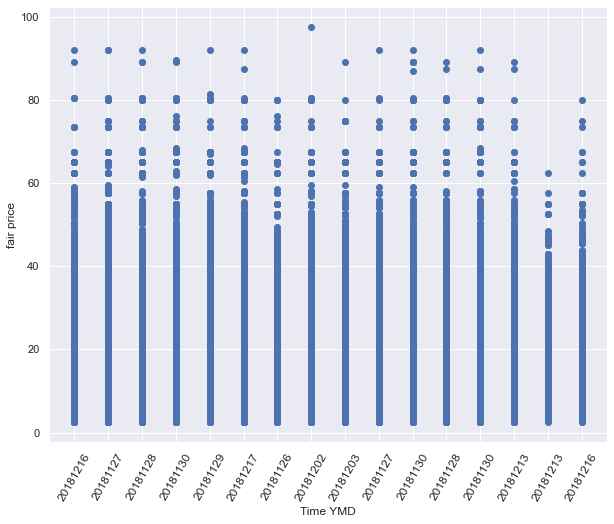

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = car_ride_df['ymd'], y = car_ride_df['price'])
ax.set_xticklabels(car_ride_df['ymd'],rotation = 60, fontsize = 'medium')
ax.set_xlabel("Time YMD")
ax.set_ylabel("fair price")
plt.show()

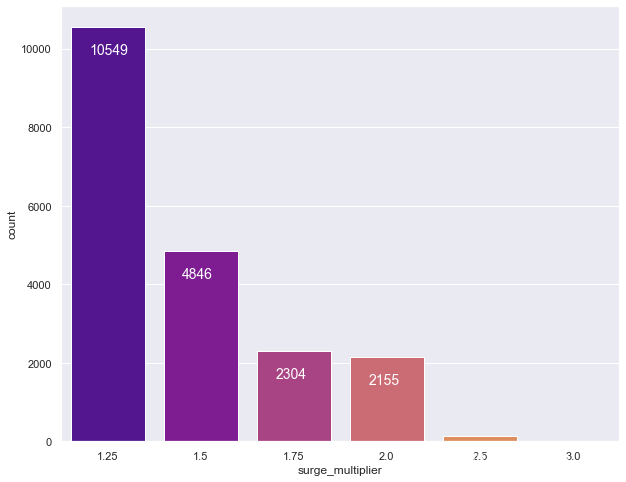

In [81]:
#surge multiplier after removing 1 from dataset to clearly see visual.
sm = pd.DataFrame()
sm = car_ride_df[car_ride_df['surge_multiplier']>1]
#sns.countplot(y = 'surge_multiplier', data =car_ride_df )
g = sns.countplot(x= 'surge_multiplier', data =sm, palette="plasma" )
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=14)
plt.show()

Creating bins for distance variable, with 0.5 increment. i.e distance in 0 - 0.5 will be converted into 0.5. 
Here we created in total 16 bins.

In [82]:
car_ride_df['distance'].unique()
bins = np.arange(0,8.5, 0.5)
l  = bins[1:].tolist()
car_ride_df['dist_bin'] = pd.cut(car_ride_df['distance'], bins , labels = l)
car_ride_df['dist_bin'].unique()

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0.5, 1.5, 1.0, 2.5, 3.5, ..., 5.5, 6.0, 6.5, 7.0, 8.0]
Length: 16
Categories (16, float64): [0.5 < 1.0 < 1.5 < 2.0 ... 6.5 < 7.0 < 7.5 < 8.0]

We are taking mean price over distance and see how much increment comes when distance increases.
some intresting insight can be seen in the graph, that the price increase gradually till 6 km ride after that, there is price drop if travel more than 6.5 km.

   dist_bin  distance    time_stamp      price  surge_multiplier
0       0.5  0.427176  1.544043e+12  12.302246          1.006518
1       1.0  0.724533  1.544047e+12  12.689302          1.008668
2       1.5  1.254970  1.544042e+12  13.612354          1.013570
3       2.0  1.722448  1.544043e+12  15.188684          1.014339
4       2.5  2.304090  1.544049e+12  16.752087          1.017362
5       3.0  2.765022  1.544049e+12  18.033705          1.016381
6       3.5  3.199727  1.544042e+12  19.633113          1.018038
7       4.0  3.667270  1.544050e+12  21.719663          1.020159
8       4.5  4.371133  1.544056e+12  23.469808          1.022803
9       5.0  4.638052  1.544065e+12  23.627947          1.019650
10      5.5  5.319493  1.544014e+12  26.951807          1.019964
11      6.0  5.606472  1.544087e+12  25.625772          1.000000
12      6.5  6.251848  1.544085e+12  23.647867          1.001185
13      7.0  6.918679  1.543863e+12  26.981132          1.000000
14      7.5  7.412678  1.

Text(0.5, 0, 'Distance')

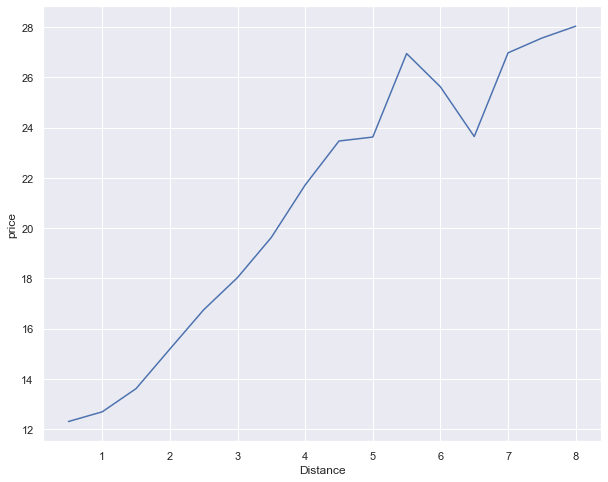

In [83]:
df1 = car_ride_df.groupby(['dist_bin']).mean(['price']).reset_index()
print(df1)
sns.lineplot(x = 'dist_bin', y = 'price',data = df1,palette= 'plasma_r')
plt.xlabel("Distance")

Outlier analysis
Here we are trying to get outlier for the distance variable.

In [84]:
# Let's see one feature as an example of "outliers findings" ... 
Q1 = car_ride_df['distance'].quantile(0.25)
Q3 = car_ride_df['distance'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [85]:
car_ride_df[(car_ride_df['distance'] > upper)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,ymd,hour,dist_bin
516,7.46,Uber,1.544820e+12,Northeastern University,Financial District,16.0,1.0,eeae82c8-83e0-44e8-bf70-8e5eb8fb83e4,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,20181214,20,7.5
1977,5.56,Uber,1.545000e+12,Boston University,Financial District,12.5,1.0,4346c8f4-c5f8-40b3-9e08-24104f0719ef,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,20181216,22,6.0
1978,5.56,Uber,1.545020e+12,Boston University,Financial District,15.0,1.0,4e9681fe-f88b-42d5-9fc1-5d2282846777,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,20181217,04,6.0
1979,5.56,Uber,1.544980e+12,Boston University,Financial District,15.0,1.0,75d0f44f-3985-467d-a8a4-1df97c2e8d25,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,20181216,17,6.0
1980,5.56,Uber,1.545050e+12,Boston University,Financial District,33.5,1.0,959b911f-a55a-4b2f-85ea-0c198b4ca061,6c84fd89-3f11-4782-9b50-97c468b19529,Black,20181217,12,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662504,5.56,Uber,1.543330e+12,Boston University,Financial District,17.0,1.0,5c6abfff-2be7-4015-b173-43ad5d7035bd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,20181127,14,6.0
662505,5.56,Uber,1.543330e+12,Boston University,Financial District,15.5,1.0,5d734f91-4b0b-4927-89d0-9b3d8b38299e,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,20181127,14,6.0
662506,5.56,Uber,1.543430e+12,Boston University,Financial District,48.0,1.0,cc6f0c5f-ada1-455c-a584-63445d0899c9,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,20181128,18,6.0
662507,5.56,Uber,1.543430e+12,Boston University,Financial District,25.0,1.0,deb4382a-7bb8-4aa0-a575-d8ce1cf530d6,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,20181128,18,6.0


# Working on Weather dataset

In [86]:
weather_df = weather_df.rename(columns = {'location':'source'})
weather_df

,temp,source,clouds,pressure,rain,time_stamp,humidity,wind,ymd,hour
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,20181216,21
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,20181216,21
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,20181216,21
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,20181216,21
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,20181216,21
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,20181203,20
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,20181203,20
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,20181203,20
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,20181203,20


In [87]:
#changing time stamp variable to ymd (year month day) format.
weather_df['ymd'] = weather_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y%m%d'))
weather_df

,temp,source,clouds,pressure,rain,time_stamp,humidity,wind,ymd,hour
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,20181216,21
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,20181216,21
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,20181216,21
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,20181216,21
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,20181216,21
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,20181203,20
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,20181203,20
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,20181203,20
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,20181203,20


# Merging two table

join Two tables using left join.
Trying to join two tables, but not yet properly merged due to some error.

In [27]:
res = pd.merge(car_ride_df, weather_df, on = ['source','ymd'], how = 'left')
res

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,hour_x,dist_bin,temp,clouds,pressure,rain,time_stamp_y,humidity,wind,hour_y
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,08,0.5,42.34,1.00,1012.15,0.2068,1545003901,0.77,11.49,21
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,08,0.5,41.68,0.44,1023.68,NaN,1544924701,0.71,6.28,21
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,08,0.5,42.75,0.17,1023.04,NaN,1544921101,0.71,6.45,21
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,08,0.5,40.99,0.40,1024.49,NaN,1544928301,0.71,6.38,21
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,08,0.5,40.15,0.41,1023.50,NaN,1544939101,0.70,7.82,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23419340,4.57,Lyft,1.544760e+12,Fenway,Financial District,27.5,1.0,1604a2f4-2e46-4db8-a151-fff43d393744,lyft_premier,Lux,...,04,5.0,29.88,0.68,1034.97,NaN,1544759101,0.71,1.96,21
23419341,4.57,Lyft,1.544760e+12,Fenway,Financial District,27.5,1.0,1604a2f4-2e46-4db8-a151-fff43d393744,lyft_premier,Lux,...,04,5.0,29.99,0.59,1035.11,NaN,1544755501,0.70,2.04,21
23419342,4.57,Lyft,1.544760e+12,Fenway,Financial District,27.5,1.0,1604a2f4-2e46-4db8-a151-fff43d393744,lyft_premier,Lux,...,04,5.0,32.61,0.27,1033.84,NaN,1544795102,0.73,3.40,21
23419343,4.57,Lyft,1.544760e+12,Fenway,Financial District,27.5,1.0,1604a2f4-2e46-4db8-a151-fff43d393744,lyft_premier,Lux,...,04,5.0,29.56,0.69,1034.96,NaN,1544748301,0.70,2.03,21


In [28]:
new = res.groupby(['id']).agg({'temp' : ['mean'], 'clouds' : ['mean'], 'pressure' : ['mean'], 'rain' : ['mean'], 'humidity' : ['mean'], 'wind' : ['mean']}).reset_index()
new

,id,temp,clouds,pressure,rain,humidity,wind
,,mean,mean,mean,mean,mean,mean
0,00005b8c-5647-4104-9ac6-94fa6a40f3c3,25.596522,0.396087,1031.484783,NaN,0.571304,3.342174
1,00006eeb-0183-40c1-8198-c441d3c8a734,42.310000,0.874583,1014.667917,0.017473,0.893750,3.892083
2,00008b42-5ecc-4f66-b4b9-b22a331634e6,33.904167,0.493750,1032.765000,NaN,0.727500,2.985000
3,000094c0-00c4-43f1-ae1b-4693eec2a580,46.053750,0.829167,1022.580000,NaN,0.833750,5.459583
4,0000a8b2-e4d3-4227-8374-af8a2366e475,43.247193,0.901404,995.795263,0.091376,0.867193,9.879825
...,...,...,...,...,...,...,...
610376,ffff9244-4aa7-4bbc-8097-7bf2e526703a,25.179130,0.398261,1031.486522,NaN,0.573913,3.170000
610377,ffff9ba3-d013-4133-8bfb-73b3357b57ca,33.799583,0.497917,1032.771667,NaN,0.730833,3.013333
610378,ffffbd2e-7553-4ba3-b3b3-754c13010fc1,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937


In [75]:
#This is final merged table for feature extraction
final_df = pd.merge(car_ride_df,new, on = ['id'], how = 'left')
final_df

C:\NiksBot\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning:

merging between different levels can give an unintended result (1 levels on the left,2 on the right)

C:\NiksBot\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,ymd,hour,dist_bin,"(temp, mean)","(clouds, mean)","(pressure, mean)","(rain, mean)","(humidity, mean)","(wind, mean)"
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,20181216,08,0.5,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,20181127,00,0.5,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,20181128,01,0.5,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,20181130,03,0.5,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,20181129,02,0.5,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610376,3.15,Uber,1.543420e+12,Northeastern University,West End,26.5,1.0,6b9cc736-3728-4f5e-b962-dbc8cd5c382b,6c84fd89-3f11-4782-9b50-97c468b19529,Black,20181128,15,3.5,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532
610377,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,20181128,15,3.5,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532
610378,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,20181214,04,3.5,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250
610379,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,20181214,04,3.5,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250


In [30]:
final_df.columns

Index([          'distance',           'cab_type',         'time_stamp',
              'destination',             'source',              'price',
         'surge_multiplier',                 'id',         'product_id',
                     'name',                'ymd',               'hour',
                 'dist_bin',     ('temp', 'mean'),   ('clouds', 'mean'),
       ('pressure', 'mean'),     ('rain', 'mean'), ('humidity', 'mean'),
           ('wind', 'mean')],
      dtype='object')

# Feature Engineering

Changing the categorical variable into numerical variable and create a new dataframe 'crf_df'

In [31]:
crf_df = pd.DataFrame()
crf_df = final_df[['dist_bin','price','surge_multiplier','ymd','hour']].copy()
crf_df

,dist_bin,price,surge_multiplier,ymd,hour
0,0.5,5.0,1.0,20181216,08
1,0.5,11.0,1.0,20181127,00
2,0.5,7.0,1.0,20181128,01
3,0.5,26.0,1.0,20181130,03
4,0.5,9.0,1.0,20181129,02
...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15
610377,3.5,17.0,1.0,20181128,15
610378,3.5,10.5,1.0,20181214,04
610379,3.5,10.5,1.0,20181214,04


In [32]:
crf_df[['temp','clouds','pressure','rain','humidity','wind']] = final_df[[('temp', 'mean'),   ('clouds', 'mean'),
       ('pressure', 'mean'),     ('rain', 'mean'), ('humidity', 'mean'),
           ('wind', 'mean')]].copy()
crf_df

,dist_bin,price,surge_multiplier,ymd,hour,temp,clouds,pressure,rain,humidity,wind
0,0.5,5.0,1.0,20181216,08,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417
1,0.5,11.0,1.0,20181127,00,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386
2,0.5,7.0,1.0,20181128,01,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937
3,0.5,26.0,1.0,20181130,03,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800
4,0.5,9.0,1.0,20181129,02,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406
...,...,...,...,...,...,...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532
610377,3.5,17.0,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532
610378,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250
610379,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250


In [33]:
crf_df['cab_type'] = final_df['cab_type'].map({'Uber': 0, 'Lyft':1})
crf_df

,dist_bin,price,surge_multiplier,ymd,hour,temp,clouds,pressure,rain,humidity,wind,cab_type
0,0.5,5.0,1.0,20181216,08,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417,1
1,0.5,11.0,1.0,20181127,00,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386,1
2,0.5,7.0,1.0,20181128,01,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937,1
3,0.5,26.0,1.0,20181130,03,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800,1
4,0.5,9.0,1.0,20181129,02,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406,1
...,...,...,...,...,...,...,...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532,0
610377,3.5,17.0,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532,0
610378,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250,0
610379,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250,0


Creating a dictionary callled places get numerical values of source and destination place.

In [34]:
place = final_df['source'].unique()
places = dict((val, np.where(place == val)[0][0]) for val in place)
places

{'Haymarket Square': 0,
 'Back Bay': 1,
 'North End': 2,
 'North Station': 3,
 'Beacon Hill': 4,
 'Boston University': 5,
 'Fenway': 6,
 'South Station': 7,
 'Theatre District': 8,
 'West End': 9,
 'Financial District': 10,
 'Northeastern University': 11}

In [35]:
crf_df['source'] = final_df['source'].map(places)
crf_df['destination'] = final_df['destination'].map(places)
crf_df

,dist_bin,price,surge_multiplier,ymd,hour,temp,clouds,pressure,rain,humidity,wind,cab_type,source,destination
0,0.5,5.0,1.0,20181216,08,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417,1,0,3
1,0.5,11.0,1.0,20181127,00,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386,1,0,3
2,0.5,7.0,1.0,20181128,01,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937,1,0,3
3,0.5,26.0,1.0,20181130,03,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800,1,0,3
4,0.5,9.0,1.0,20181129,02,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532,0,9,11
610377,3.5,17.0,1.0,20181128,15,37.045949,0.533671,992.193544,0.002100,0.733671,7.812532,0,9,11
610378,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250,0,9,11
610379,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250,0,9,11


Creating a names dictionary to get numerical values of car names.

In [36]:
name = final_df['name'].unique()
names = dict((val, np.where(name== val)[0][0]) for val in name)
names

{'Shared': 0,
 'Lux': 1,
 'Lyft': 2,
 'Lux Black XL': 3,
 'Lyft XL': 4,
 'Lux Black': 5,
 'UberXL': 6,
 'Black': 7,
 'UberX': 8,
 'WAV': 9,
 'Black SUV': 10,
 'UberPool': 11}

In [37]:
crf_df['name'] = final_df['name'].map(names)


In [38]:
crf_df['rain'] = crf_df['rain'].replace('nan', 0)
crf_df['rain'] = crf_df['rain'].map(lambda x: '{0:.3f}'.format(x))
crf_df['rain'] = crf_df['rain'].replace('nan', 0)
crf_df

,dist_bin,price,surge_multiplier,ymd,hour,temp,clouds,pressure,rain,humidity,wind,cab_type,source,destination,name
0,0.5,5.0,1.0,20181216,08,41.034167,0.691667,1020.190833,0.045,0.735417,8.290417,1,0,3,0
1,0.5,11.0,1.0,20181127,00,43.354561,0.897895,995.805965,0.117,0.864211,10.154386,1,0,3,1
2,0.5,7.0,1.0,20181128,01,37.106962,0.533038,992.194051,0.002,0.731899,7.854937,1,0,3,2
3,0.5,26.0,1.0,20181130,03,35.638400,0.290000,1015.536800,0,0.712400,3.796800,1,0,3,3
4,0.5,9.0,1.0,20181129,02,38.865469,0.533750,1000.906562,0.002,0.672500,10.221406,1,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15,37.045949,0.533671,992.193544,0.002,0.733671,7.812532,0,9,11,7
610377,3.5,17.0,1.0,20181128,15,37.045949,0.533671,992.193544,0.002,0.733671,7.812532,0,9,11,6
610378,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,0,0.731250,3.026250,0,9,11,8
610379,3.5,10.5,1.0,20181214,04,33.811667,0.495000,1032.762917,0,0.731250,3.026250,0,9,11,9


In [39]:
crf_df['temp'] = crf_df['temp'].map(lambda x: '{0:.3f}'.format(x))
crf_df['clouds'] = crf_df['clouds'].map(lambda x: '{0:.3f}'.format(x))
crf_df['pressure'] = crf_df['pressure'].map(lambda x: '{0:.3f}'.format(x))
crf_df['humidity'] = crf_df['humidity'].map(lambda x: '{0:.3f}'.format(x))
crf_df['wind'] = crf_df['wind'].map(lambda x: '{0:.3f}'.format(x))
crf_df

,dist_bin,price,surge_multiplier,ymd,hour,temp,clouds,pressure,rain,humidity,wind,cab_type,source,destination,name
0,0.5,5.0,1.0,20181216,08,41.034,0.692,1020.191,0.045,0.735,8.290,1,0,3,0
1,0.5,11.0,1.0,20181127,00,43.355,0.898,995.806,0.117,0.864,10.154,1,0,3,1
2,0.5,7.0,1.0,20181128,01,37.107,0.533,992.194,0.002,0.732,7.855,1,0,3,2
3,0.5,26.0,1.0,20181130,03,35.638,0.290,1015.537,0,0.712,3.797,1,0,3,3
4,0.5,9.0,1.0,20181129,02,38.865,0.534,1000.907,0.002,0.672,10.221,1,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610376,3.5,26.5,1.0,20181128,15,37.046,0.534,992.194,0.002,0.734,7.813,0,9,11,7
610377,3.5,17.0,1.0,20181128,15,37.046,0.534,992.194,0.002,0.734,7.813,0,9,11,6
610378,3.5,10.5,1.0,20181214,04,33.812,0.495,1032.763,0,0.731,3.026,0,9,11,8
610379,3.5,10.5,1.0,20181214,04,33.812,0.495,1032.763,0,0.731,3.026,0,9,11,9


In [47]:
crf_df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

# Model Training

I am going to use Random Forest model.

In [48]:
X = crf_df.drop(columns=['surge_multiplier']).values
y0 = crf_df['surge_multiplier'].values

In [49]:
X

array([[0.5, 5.0, '20181216', ..., 0, 3, 0],
       [0.5, 11.0, '20181127', ..., 0, 3, 1],
       [0.5, 7.0, '20181128', ..., 0, 3, 2],
       ...,
       [3.5, 10.5, '20181214', ..., 9, 11, 8],
       [3.5, 10.5, '20181214', ..., 9, 11, 9],
       [5.0, 27.5, '20181214', ..., 10, 6, 1]], dtype=object)

In [68]:
y = (2 * LabelEncoder().fit_transform(y0)) - 5
np.unique(y)

array([-5, -3, -1,  1,  3,  5,  7], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (488304, 14)
Shape of X_test=> (122077, 14)
Shape of Y_train=> (488304,)
Shape of Y_test=> (122077,)


In [72]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train,pos_label='positive',  average='micro'))                                           

Training Set Evaluation F1-Score=> 0.9970694485402536


C:\NiksBot\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



In [74]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test, pos_label='positive',  average='micro'))

Testing Set Evaluation F1-Score=> 0.9783251554346847


C:\NiksBot\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

